# **평가**

머신러닝의 프로세스 : 데이터 가공/변환 -> 모델 학습/예측 -> 평가(Evaluation)

머신러닝 모델의 예측 성능 평가 지표(Evaluation Metric)
1. 회귀 모델
- 실제 값과 예측 값의 오차 평균값에 기반함
2. 분류 모델
- 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하다 단순히 이러한 정확도만 판단하면 잘못된 평가결과에 빠지게 됨
- 분류의 성능 평가 지표
  - 정확도(Accuracy)
  - 오차행렬(Confusion Matrix)
  - 정밀도(Precision)
  - 재현율(Recall)
  - F1 스코어
  - ROC AUC

**1. 정확도**
- 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
- 정확도(Accuracy) = 예측결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
- 직관적으로 모델 예측 성능을 나타내는 평가지표이나, 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있음

이번 예제에서는 사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Classifier을 생성해보자.
이때 BaseEstimator은 Customized 형태의 Estimator를 개발자가 생성할 수 있다. 여기서 생성할 MyDummyClassifier 클래스는 학습을 수행하는 fit() 메서드가 아무것도 수행하지 않으며 예측을 수행하는 predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 매우 단순한 Classifier이다.

In [1]:
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
  # fit()메서드는 아무것도 학습하지 않음.
  def fit(self, X, y=None):
    pass
  # predict()메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
  def predict(self, X):
     pred = np.zeros((X.shape[0], 1))
     for i in range(X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1

      return pred

여기서 생성된 MyDummyClassifier을 이용하여 타이타닉 생존자 예측을 수행해보자.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행.
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터로 분할.
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.6145


<ipython-input-3-8949c9d2afb9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-3-8949c9d2afb9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass

  # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 변환
  def predict(self, X):
      return np.zeros((len(X),1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [14]:
# 불균형한 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


**2. 오차 행렬**
- 이진 분류에서 성능 지표로 자주 활용됨
- 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표
- 4분면의 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타냄
  - 4분면의 왼쪽, 오른쪽을 예측된 클래스값 기준 Negative, Positive으로 분류함
  - 4분면의 위, 아래를 실제 클래스값 기준으로 Negative와 Positive로 분류함
  - TN, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정값(값 1)과 Negative 결정값(값 0)의 결합에 따라 결정됨
    - TN: 예측값을 Negative 값 0으로 예측했고, 실제 값 역시 Negative 값 0
    - FP: 예측 값을 Positive 값 1로 예측했고, 실제 값은 Negative 값 0
    - FN: 예측 값을 Negative값 0으로 예측했는데 실제 값은 Positive 값 1
    - TP: 예측 값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1

사이킷런은 오차 행렬을 구하기 위하여 confision_matrix() API를 제공함 .

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

출력된 오차 행렬은 ndarray 형태이다. 이때 이진 분류의 TN, FP FN, FP는 상단 도표와 동일한 위치를 가지고 array에서 가져올 수 있다. 즉 TN은 array[0,0]으로 405, FP는 array[0,1]로 0, FN은 array[0-1,0]으로 45, TP는 array[1,1]로 0에 해당한다.

TP,TN, FP, FN의 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보를 제공하는데, 이 값을 조합하여 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(Precision), 재현율(Recall)의 값을 알 수 있다.
- 정확도 = 예측 결과와 실제값이 동일한 건수 / 전체 데이터 수 = (TN+TP)/(TN+FP+FN+TP)
- 일반적으로 이러한 불균형한 레이블 클래스를 가지는 이진 분류 모델이서는 많은 데이터 중에서 중점적을 찾아야 하는 매우 적은 수의 결괏 값에 Positive를 설정하여 1값을 부여하고, 그렇지 않은 경우는 Negative로 0값을 부여하는 경우가 많다.
  - 따라서 불균형한 이진 분류 데이터 세트에서 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML알고리즘은 Positive보다 Negative로 예측 정확도가 높아지는 경향이 발생함

**3. 정밀도와 재현율**
- Positive 데이터 세트의 예측 성능에 좀 더 초점을 많든 평가 지표
- 정밀도 = TP/(FP+TP) : 에측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율로 positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표라는 의미인 양성 예측도라고도 불림
- 재현율 = TP/(FN+TP) : 실제 값이 Positive인 대상 중에 예측과 실제 값이 모두 Positive로 일치한 데이터의 비율로 민감도(Sensitivy) 또는 TPR(True Positive Rate)라고도 불림
- 보통은 재현율이 정밀도에 비하여 상대적으로 중요한 업무가 많으나 정밀도가 더 중요한 지표인 경우도 존재
  - 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
  - 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
- 재현율과 정밀도 모두 TP를 높이는데 동일하게 초점을 맞추지만 재현율은 FN(실제 Positive, 예측 Negative)를 낮추는데, 정밀도는 FP를 낮추는데 초점을 맞추는다는 점이 다름 => 보완적 지표로 작용하며 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 방법임

앞의 타이타닉 예제에서는 정확도에만 초점을 맞췄으나 이번에는 오차 행렬 및 정밀도, 재현율을 모두 구하여 예측 성능을 평가해 보도록 하자. 사이킷런에서 정밀도와 재현율을 다음 코드로 계산을 할 수 있다.
- 정밀도 계산: precision_score()
- 재현율 계산: recall_score()
- confusion matrix, accuracy, precision, recall 등의 평가를 한꺼번에 호출하는 경우: get_clf_eval()


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율{2:.4f}'.format(accuracy, precision, recall))

로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 confusion matrix, accuracy, precision, recall 평가를 수행한다.
- solver='liblinear': LogisticRegression 객체의 생성 인자로, 로지스틱 회귀의 최적화 알고리즘 유형을 지정해줌
  - 작은 데이터 세트의 이진 분류의 경우, solver= liblinear 가 성능이 좋음
  - solver의 defalut값(lbfgs): 데이터 세트가 상대적으로 크고 다중 분류인 경우에 적함  


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율0.7705


<ipython-input-3-8949c9d2afb9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-3-8949c9d2afb9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

**정밀도/재현율 트레이드오프**

분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조되어야 하는 경우 분류의 결정 임곗값(Threshold)을 조정하여 정밀도 또는 재현율의 수치를 높일 수 있다.

-> but 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 한쪽을 강제로 높이면 한쪽의 수치는 떨어지게 됨 == **'트레이드오프(Trade-off)'**

**predict_proba()**
- 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환함
- 입력 파라미터: predict() 메서드와 동일하게 보통 테스트 피처 데이터 세트를 입력
- 반환 값
  - 개별 클래스의 예측 확률을 ndarray m*n (m: 입력ㄱ밧의 레코드 수, n: 클래스 값 유형) 형태로 반환
  - 입력 테스트 데이터 세트의 표본 개수가 100개이고 예측 클래스 값 유형이 2개(이진 분류)라면 반환 값은 100 * 2 ndarray임
  - 각 열은 개별 클래스의 예측 확률인데, 이진분류에서 첫 번째 칼럼은 0 Negative의 확률, 두 번째 칼럼은 1 Positive의 확률이다.

In [23]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result =np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


반환 결과인 ndarray는 0과 1에 대한 확률을 나타내기 때문에 첫 번째 칼럼과 두 번째 칼럼의 값을 더하면 1이 된다. 그리고 맨 마지막 줄의 predict() 메서드의 결과 비교에서도 나타난 것과 같이 두 개의 칼럼 중에서 더 큰 확률 값으로 predict() 메서드가 최종 예측하고 있다.


In [24]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2], [2, 0, 0], [0, 1.1, 1.2]]

# X와 개별 원소들이 thresholdㄱ밧보다 같거나 작으면 0을 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [27]:
from sklearn.preprocessing import Binarizer

# Binarizer의 treshold 설정값, 분류 결정 임곗값임.
custom_threshold = 0.5

# predict_probe() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer을 적용
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율0.7705


In [29]:
# Binarizer의 threshold 설정값을 0.4로 설정, 즉 분류 결정 임곗값을 0.5dptj 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율0.8197


- Positive 예측 값이 많아지면 상대적으로 재현율의 값이 높아짐 (양성 예측을 많이 하다보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄게 된 것)

In [36]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # threshold list 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값', custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

임곗값 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율0.8197
임곗값 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율0.7869
임곗값 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율0.7705
임곗값 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율0.7377
임곗값 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율0.7213


** precision_recall_curve()**
- 입력 파라미터
  - y_true: 실제 클래스값 배열 (배열 크기=[데이터 건수])
  - proba_pred: Positive 칼럼의 예측활률 배열 (배열 크기 = [데이터 건수])
- 반환 값
  - 정밀도: 임곗값 별 정밀도 값을 배열로 반환
  - 재현율: 임곗값 별 재현율 값을 배열로 반환

In [38]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도:  [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율:  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


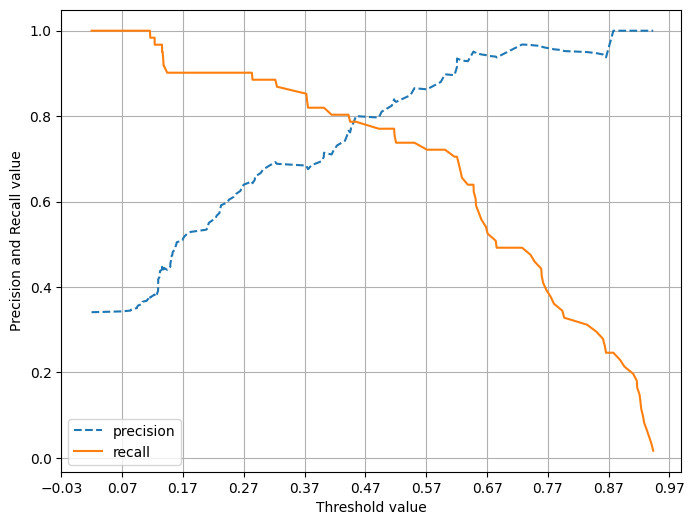

In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값으로 ,Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8, 6))
  threshold_boundary=thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  # threshold 값 X축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1) ,2))

  # X축, Y축 label과 legend, 그리고 grid 서렁
  plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
  plt.legend();plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

**정밀도와 재현율의 맹점**
- Positive 예측의 임계값을 변경함에 따라 정밀도와 재현율의 수치가 변경되는데, 이는 업무환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용되어야 함
- 정밀도가 100%가 되는법: 확실한 기준이 되는 경우만 positive, 그렇지 않은 경우 나머지는 모두 Negative로 예측
- 재현율 100%가 되는법: 모든 환자를 Positive로 예측하기

-> 이와같이 정밀도와 재현율 성능 수치는 극단적인 수치조작이 가능하기 때문에 이를 적절하게 조합하는 것이 중요하다.

**4. F1 스코어**
- 정밀도와 재현율을 결합한 지표로, 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가지게 됨

In [45]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [50]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)

  # F1 스코어 추가
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  # f1 socre print 추가
  print('정확도:{0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.7576
임곗값 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도:0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1: 0.7869
임곗값 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1: 0.7966
임곗값 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도:0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1: 0.7965
임곗값 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1: 0.8000


**5. ROC 곡선과 AUC**
- 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표

ROC 곡선
- FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로, FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선의 형태로 나타남
  - TPR(민감도)는 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타냄(질병이 있는 사람은 질병이 있는것으로 양성판정)
  - TNR(특이성)은 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타냄 (질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)
    - FPR = FP / (FP + TN) = 1 - TNR = 1- 특이성
- roc_curve()
  - 입력 파라미터
    - y_true: 실제 클래스 값 array (array shape = [데이터 건수])
    - y_score: predict_proba()의 반환값 array에서 Positive 칼럼의 예측 확률이 보통 사용됨
  - 반환값
    - fpr: fpr 값을 array로 변환
    - tpr: tpr값을 array로 변환
    - thresholds: threshold 값 array

AUC 값
- 분류의 성능 지표로 사용되며 ROC 곡선 면적에 기반한 값으로 결정됨
- ROC 곡성 밑의 면적을 구한 것으로 일반적으로 1에 가까울 수록 좋은 수치를 가진다고 할 수 있음
  - FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있는지 확인하는 것이 중요함

In [51]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임겟값을 5 Step으로 추출.
# Thresholds[0]은 max(예측확률)+1로 임의 설정됨, 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR의 값
print('샘플 임계값별 FRP:', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임계값별 FRP: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임계값별 TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


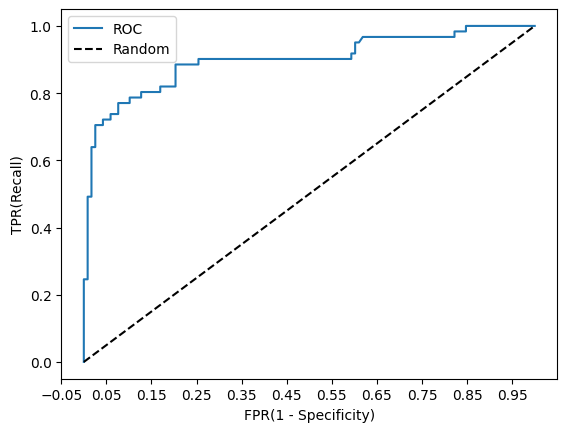

In [56]:
def roc_curve_plot(y_test, pred_proba_c1):
  # 임계값에 따른 FPR, TPR 값을 반환받음.
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  # ROC 곡선을 그래프 곡선으로 그림.
  plt.plot(fprs, tprs, label='ROC')
  # 가운데 대각선 직선을 그림.
  plt.plot([0,1], [0,1], 'k--', label='Random')

  # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlabel('FPR(1 - Specificity)'); plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])

In [57]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC값: {0:.4f}'.format(roc_score))

ROC AUC값: 0.8987


In [96]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  if pred is None or pred_proba is None:
      raise ValueError("pred와 pred_proba를 모두 제공해야 합니다.")

  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도:{0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

**6. 피마 인디언 당뇨병 예측**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [62]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [94]:
# 피처 데이터 세트 x, 레이블 데이터 세트 우를 추출.
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1 을 이용해 추출
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [22 32]]
정확도:0.7792, 정밀도: 0.7273, 재현율: 0.5926, F1: 0.7966, AUC: 0.8437


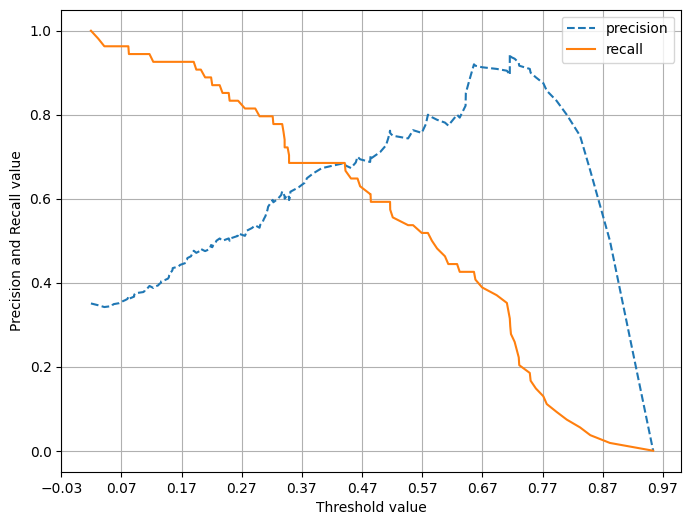

In [67]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [68]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


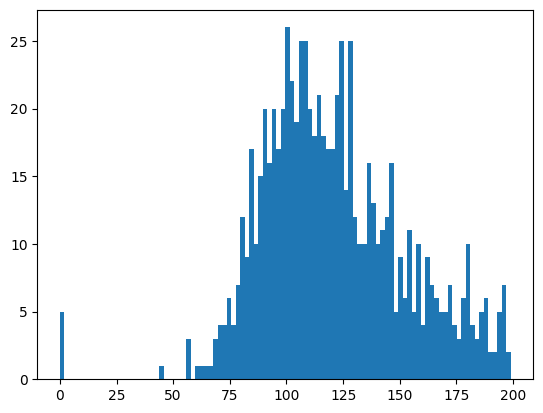

In [69]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

In [73]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처 별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [91]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

In [92]:
X = diabetes_data.iloc[:, :-1 ]
y = diabetes_data.iloc[:, -1 ]
 # StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용

scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2,random_state = 156, stratify=y)

 # 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1 ]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도:0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.7966, AUC: 0.8433


In [103]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_clf.predict_proba(X_test)
print("pred_proba 확인:", pred_proba[:, 1][:5])  # 앞 5개 값 출력
print("y_test 확인:", y_test[:5])  # 앞 5개 값 출력
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

pred_proba 확인: [0.06922473 0.22807679 0.15847851 0.54586167 0.32845245]
y_test 확인: 81     0
682    0
169    0
693    1
9      1
Name: Outcome, dtype: int64
임곗값 0.3


ValueError: pred와 pred_proba를 모두 제공해야 합니다.

In [81]:
# 임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환.
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도:0.7987, 정밀도: 0.7447, 재현율: 0.6481, \F1: 0.7966, AUC: 0.8433
